In [59]:
# import libraries 
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
from matplotlib import colorbar
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

np.random_state = 42

In [60]:
import nltk
print(nltk.data.path)



['C:\\Users\\Faical/nltk_data', 'c:\\Users\\Faical\\anaconda3\\nltk_data', 'c:\\Users\\Faical\\anaconda3\\share\\nltk_data', 'c:\\Users\\Faical\\anaconda3\\lib\\nltk_data', 'C:\\Users\\Faical\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


## Loading Data

In [24]:
path = "../data/processed/"

nlp_paris_listing = pd.read_csv(path + 'nlp_paris_listing_clean_new.csv', encoding='utf-8')
nlp_paris_listing.tail(2)

,Unnamed: 0,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
5318,271173,27217502,Appartement au coeur de Paris,204968863,2018-07-25,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,t,t,Luxembourg,NaN,Paris,48.85372,2.33746,Entire apartment,Entire place,3,1.0,"[""Dishwasher"", ""Essentials"", ""Stove"", ""Hot wat...",50.0,5,30,91.0,10.0,8.0,10.0,10.0,10.0,9.0,t
5319,271179,32100517,PARIS-BOHÃÅ ME,2133318,2015-04-10,"Paris, Ile-de-France, France",within a few hours,1.0,1.0,f,1.0,t,t,Buttes-Chaumont,NaN,Paris,48.87608,2.39960,Entire apartment,Entire place,3,1.0,"[""Shampoo"", ""Heating"", ""Iron"", ""Kitchen"", ""Hai...",59.0,5,60,98.0,10.0,8.0,10.0,10.0,10.0,10.0,f


In [25]:
#print(nlp_paris_listing.isna().sum())
nlp_paris_listing.drop(columns=['district','Unnamed: 0','host_id'], inplace=True)
nlp_paris_listing.tail(2)

,listing_id,name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
5318,27217502,Appartement au coeur de Paris,2018-07-25,"Paris, Ile-de-France, France",within an hour,1.0,1.0,f,1.0,t,t,Luxembourg,Paris,48.85372,2.33746,Entire apartment,Entire place,3,1.0,"[""Dishwasher"", ""Essentials"", ""Stove"", ""Hot wat...",50.0,5,30,91.0,10.0,8.0,10.0,10.0,10.0,9.0,t
5319,32100517,PARIS-BOHÃÅ ME,2015-04-10,"Paris, Ile-de-France, France",within a few hours,1.0,1.0,f,1.0,t,t,Buttes-Chaumont,Paris,48.87608,2.39960,Entire apartment,Entire place,3,1.0,"[""Shampoo"", ""Heating"", ""Iron"", ""Kitchen"", ""Hai...",59.0,5,60,98.0,10.0,8.0,10.0,10.0,10.0,10.0,f


In [30]:
# nlp_paris_listing.info()
object_columns = nlp_paris_listing.select_dtypes(include=['object', 'string'])
nlp_paris_listing_txt = object_columns[['name', 'host_location', 'host_response_time',
                                        'neighbourhood',
                                        'city',
                                        'property_type',
                                        'room_type',
                                        'amenities']]
nlp_paris_listing_txt.head(2)

,name,host_location,host_response_time,neighbourhood,city,property_type,room_type,amenities
0,Paris Seine 4th arrondissement,"Val-de-Marne, Ile-de-France, France",within an hour,Hotel-de-Ville,Paris,Entire apartment,Entire place,"[""Dishwasher"", ""Essentials"", ""Stove"", ""Hot wat..."
1,Cosy Parisian Flat,FR,within an hour,Luxembourg,Paris,Entire apartment,Entire place,"[""Heating"", ""Iron"", ""Kitchen"", ""Hair dryer"", ""..."


In [32]:
nlp_paris_listing_txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                5320 non-null   object
 1   host_location       5320 non-null   object
 2   host_response_time  5320 non-null   object
 3   neighbourhood       5320 non-null   object
 4   city                5320 non-null   object
 5   property_type       5320 non-null   object
 6   room_type           5320 non-null   object
 7   amenities           5320 non-null   object
dtypes: object(8)
memory usage: 332.6+ KB


## Normalizing and Tokenizing


In [36]:
import nltk
from nltk import WordNetLemmatizer, pos_tag 
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize

In [69]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Faical\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Faical\AppData\Roaming\nltk_data...


True

In [70]:
# takes in untokenized document and returns fully normalized token list
def process_doc(doc):

    #initialize lemmatizer
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format.
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
        
    # remove stop words and punctuations, then lower case
    doc_norm = [tok.lower() for tok in word_tokenize(doc) if ((tok.isalpha()) & (tok not in stop_words)) ]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    
    # creates list of tuples with tokens and POS tags in wordnet format
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm))) 
    doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]
    
    return doc_norm

### Apply tokenization to entire dataframe


In [71]:
def tokenize_df(df):
    """
    Helper function tokenizes each column in the dataframe.
    Uses the process_doc helper function to tokenize and normalize each column into string values
    """
    # get list of column names 
    col_names = list(nlp_paris_listing_txt.columns)
    # just get the relevant text columns
    col_names = col_names[2:]

    # create an empty dataframe
    tokenized_df = pd.DataFrame()

    # tokenize each column 
    for col in col_names:
        
        # use helper function to get a series of tokenized text for each column, and flatten the lists into tokens
        tokenized_series = df[col].apply(process_doc).apply(" ".join)
        
        # convert each col into a df
        tokenized_col = tokenized_series.to_frame().transpose()
        
        # add to overall df
        tokenized_df = tokenized_df.append(tokenized_col)
    
    # pivot the rows and columns 
    tokenized_df = tokenized_df.transpose()
    
    # merge the id, listing_url to the tokenized columns
    tokenized_df = df.iloc[:,[0,1]].join(tokenized_df)

    return tokenized_df

In [72]:
# tokenize sd_text and put tokenized results into a new df called tokenized_text
tokenized_text = tokenize_df(nlp_paris_listing_txt)
tokenized_text.head()
# save as csv
path = "../data/processed/"
tokenized_text.to_csv(path + 'paris_listing_token_txt')

In [74]:
tokenized_text = pd.read_csv('../data/processed/paris_listing_token_txt', index_col= 0)
tokenized_text = tokenized_text.fillna(' ')
tokenized_text.head(3)

,name,host_location,host_response_time,neighbourhood,city,property_type,room_type,amenities
0,Paris Seine 4th arrondissement,"Val-de-Marne, Ile-de-France, France",hour,,paris,entire apartment,entire place,dishwasher essential stave hot water hanger sm...
1,Cosy Parisian Flat,FR,hour,luxembourg,paris,entire apartment,entire place,heat iron kitchen hair dryer essential washer ...
2,Spacious flat just two minutes from Champs-Ely...,FR,hour,elysee,paris,entire apartment,entire place,dishwasher essential stave hot water hanger sm...


## Data Visualization
- Now that the text for each listing category has been tokenized, let's explore the distribution of words using a simple wordcloud for some of the features.
### Airbnb Listing Descriptions
#### Name




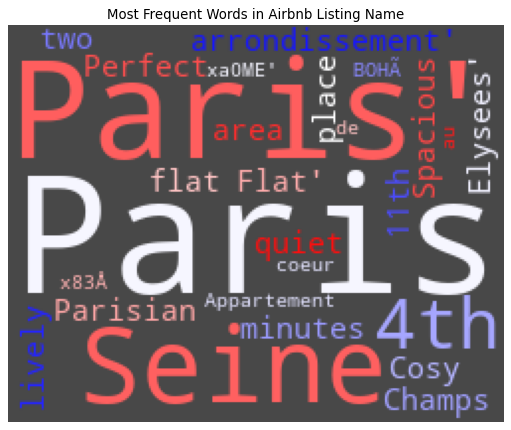

In [75]:
# creates an array of all values in the name column
name = tokenized_text['name'].values

# create wordcloud
name_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(name))

# show fig
figure(figsize=(8, 8), dpi=80)
plt.imshow(name_wordcloud)
plt.title('Most Frequent Words in Airbnb Listing Name')
plt.axis('off')

# name_wordcloud.to_file('images/wordcloud_name.png')
plt.show()

### Amenities

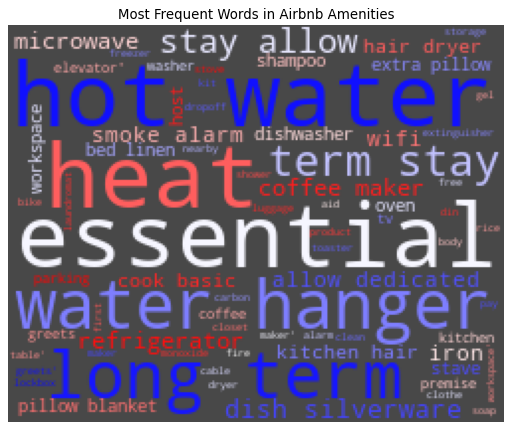

In [78]:
# creates an array of all values in the name column
summary = tokenized_text['amenities'].values

# create wordcloud
summary_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(summary))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(summary_wordcloud)
plt.title('Most Frequent Words in Airbnb Amenities')
plt.axis('off')

# summary_wordcloud.to_file('images/wordcloud_summary.png')
plt.show()


#### Property Type

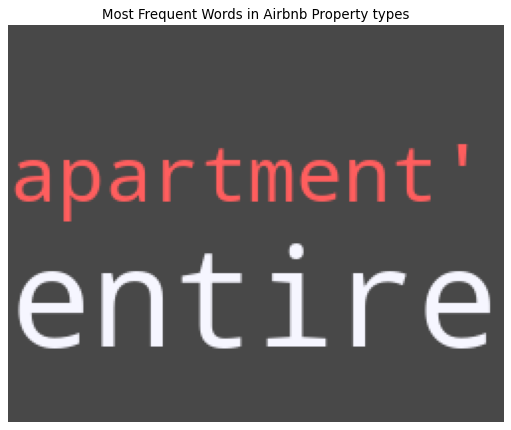

In [79]:
# creates an array of all values in the name column
space = tokenized_text['property_type'].values

# create wordcloud
space_wordcloud = WordCloud(background_color = '#484848',
                           colormap = 'bwr',
                           max_font_size = 100,
                           width = 250,
                           height = 200,
                           random_state = 10).generate(str(space))

# show fig
figure(figsize=(8, 8), dpi = 80)
plt.imshow(space_wordcloud)
plt.title('Most Frequent Words in Airbnb Property types')
plt.axis('off')

# space_wordcloud.to_file('images/wordcloud_space.png')
plt.show()